#Imprting imprtant libraries

In [ ]:
import numpy as np
import pandas as pd #for reading and computing the dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
data = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
def missing_values_percentage(data):
    total_cells = data.size
    missing_cells = data.isna().sum().values
    percentage = ((data.isna().sum()/len(data)) * 100).apply(lambda x: f'{x:.2f}%')


    return percentage

In [ ]:
missing_values_percentage(data)

Name         0.00%
Year         3.40%
Duration    53.32%
Genre       12.10%
Rating      48.94%
Votes       48.93%
Director     3.39%
Actor 1     10.43%
Actor 2     15.37%
Actor 3     20.27%
dtype: object

In [ ]:
data.isnull().sum(axis=1).sort_values(ascending=False)

1920     9
1836     9
3807     9
8669     9
9600     9
        ..
7385     0
7383     0
7380     0
7377     0
15508    0
Length: 15509, dtype: int64

In [ ]:
#now we will drop two coloumns Actor2 and Actor3 as there were so many missing values in these
data.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
dtypes: float64(1), object(7)
memory usage: 969.4+ KB


In [ ]:
# now we will drop the null values from the coloums 'duration'
data.dropna(subset=['Duration'],inplace=True)


In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol


In [ ]:
data.dropna(subset=['Year'],inplace=True)


In [ ]:
#again reviewing the missing values
missing_values_percentage(data)

Name         0.00%
Year         0.00%
Duration     0.00%
Genre        2.57%
Rating      17.77%
Votes       17.77%
Director     0.18%
Actor 1      3.47%
dtype: object

In [ ]:
#optimizing our dataset
data.dropna(subset=['Rating'],inplace=True)
data.dropna(subset=['Votes'],inplace=True)



In [ ]:
missing_values_percentage(data)

Name        0.00%
Year        0.00%
Duration    0.00%
Genre       0.53%
Rating      0.00%
Votes       0.00%
Director    0.02%
Actor 1     1.28%
dtype: object

In [ ]:
data.Director.describe()

count             5850
unique            2549
top       David Dhawan
freq                41
Name: Director, dtype: object

In [ ]:
#sorting the dataset in descending order
data.groupby('Director').Director.count().sort_values(ascending=False)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
                        ..
Kathir                   1
Kashmira Shah            1
Kashinath                1
Kasam Ali                1
Zunaid Memon             1
Name: Director, Length: 2549, dtype: int64

In [ ]:
#as count of Daving Dhawan is greatest
data['Director'].fillna('David Dhawan',inplace=True)

In [ ]:
missing_values_percentage(data)

Name        0.00%
Year        0.00%
Duration    0.00%
Genre       0.53%
Rating      0.00%
Votes       0.00%
Director    0.00%
Actor 1     1.28%
dtype: object

In [ ]:
data.groupby('Genre').Genre.count().sort_values(ascending=False)

Genre
Drama                            870
Drama, Romance                   334
Action, Crime, Drama             329
Action, Drama                    207
Comedy, Drama                    206
                                ... 
Documentary, Adventure, Crime      1
Documentary, Adventure, Music      1
Documentary, Biography, Music      1
Documentary, Comedy, Drama         1
Crime, Musical, Mystery            1
Name: Genre, Length: 393, dtype: int64

In [ ]:
#similarly in Genre coloumns
data['Genre'].fillna('Drama',inplace=True)

In [ ]:
missing_values_percentage(data)

Name        0.00%
Year        0.00%
Duration    0.00%
Genre       0.00%
Rating      0.00%
Votes       0.00%
Director    0.00%
Actor 1     1.28%
dtype: object

In [ ]:
data['Actor 1'].describe()

count                 5776
unique                2046
top       Amitabh Bachchan
freq                   104
Name: Actor 1, dtype: object

In [ ]:
data['Actor 1'].fillna('Amitabh Bachchan', inplace=True)

In [ ]:
missing_values_percentage(data)

Name        0.00%
Year        0.00%
Duration    0.00%
Genre       0.00%
Rating      0.00%
Votes       0.00%
Director    0.00%
Actor 1     0.00%
dtype: object

In [ ]:
data['Year'] = data['Year'].str.replace(r'[()]', '', regex=True)

In [ ]:
data['Duration'] = data['Duration'].str.replace(r' min', '', regex=True)

In [ ]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


In [ ]:
data['Year'] = data['Year'].astype('int')
data['Duration'] = data['Duration'].astype('int')
data['Votes'] = data['Votes'].str.replace(',','')
data['Votes'] = data['Votes'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 411.4+ KB


In [ ]:
data.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Duration', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Rating'>

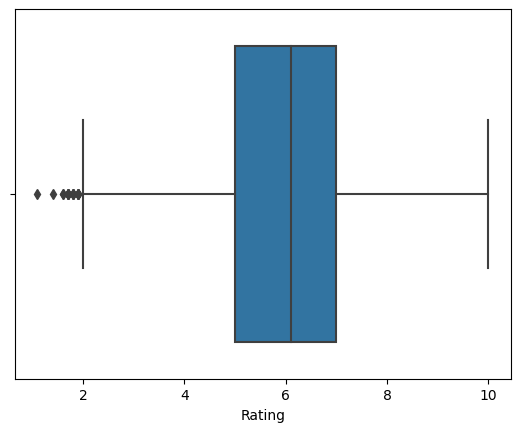

In [ ]:
sns.boxplot(x=data["Rating"])

<Axes: xlabel='Votes'>

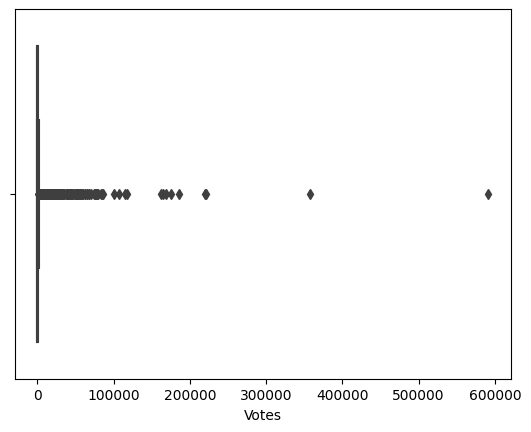

In [ ]:
sns.boxplot(x=data["Votes"])

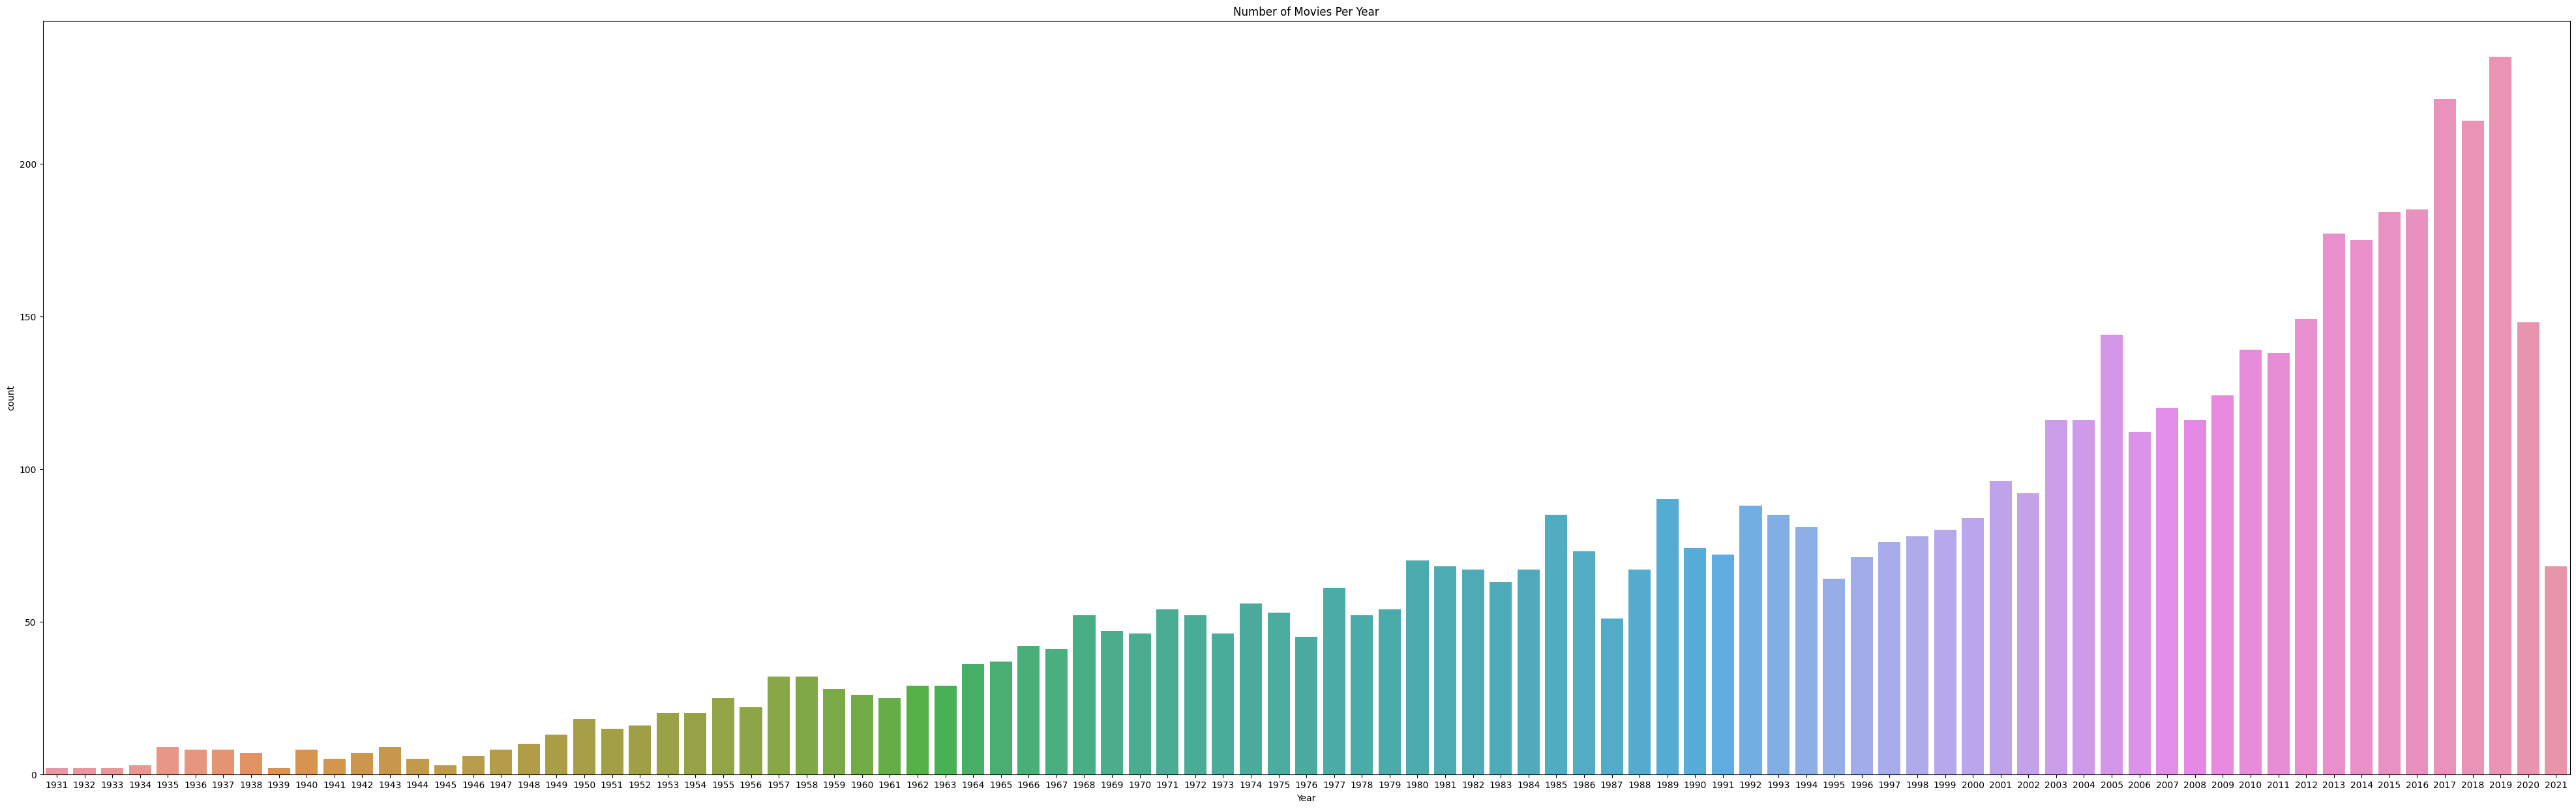

In [ ]:
plt.figure(figsize=(50, 15))

# Using Seaborn to create a bar plot
sns.countplot(x='Year', data=data)

plt.title('Number of Movies Per Year')
plt.show()

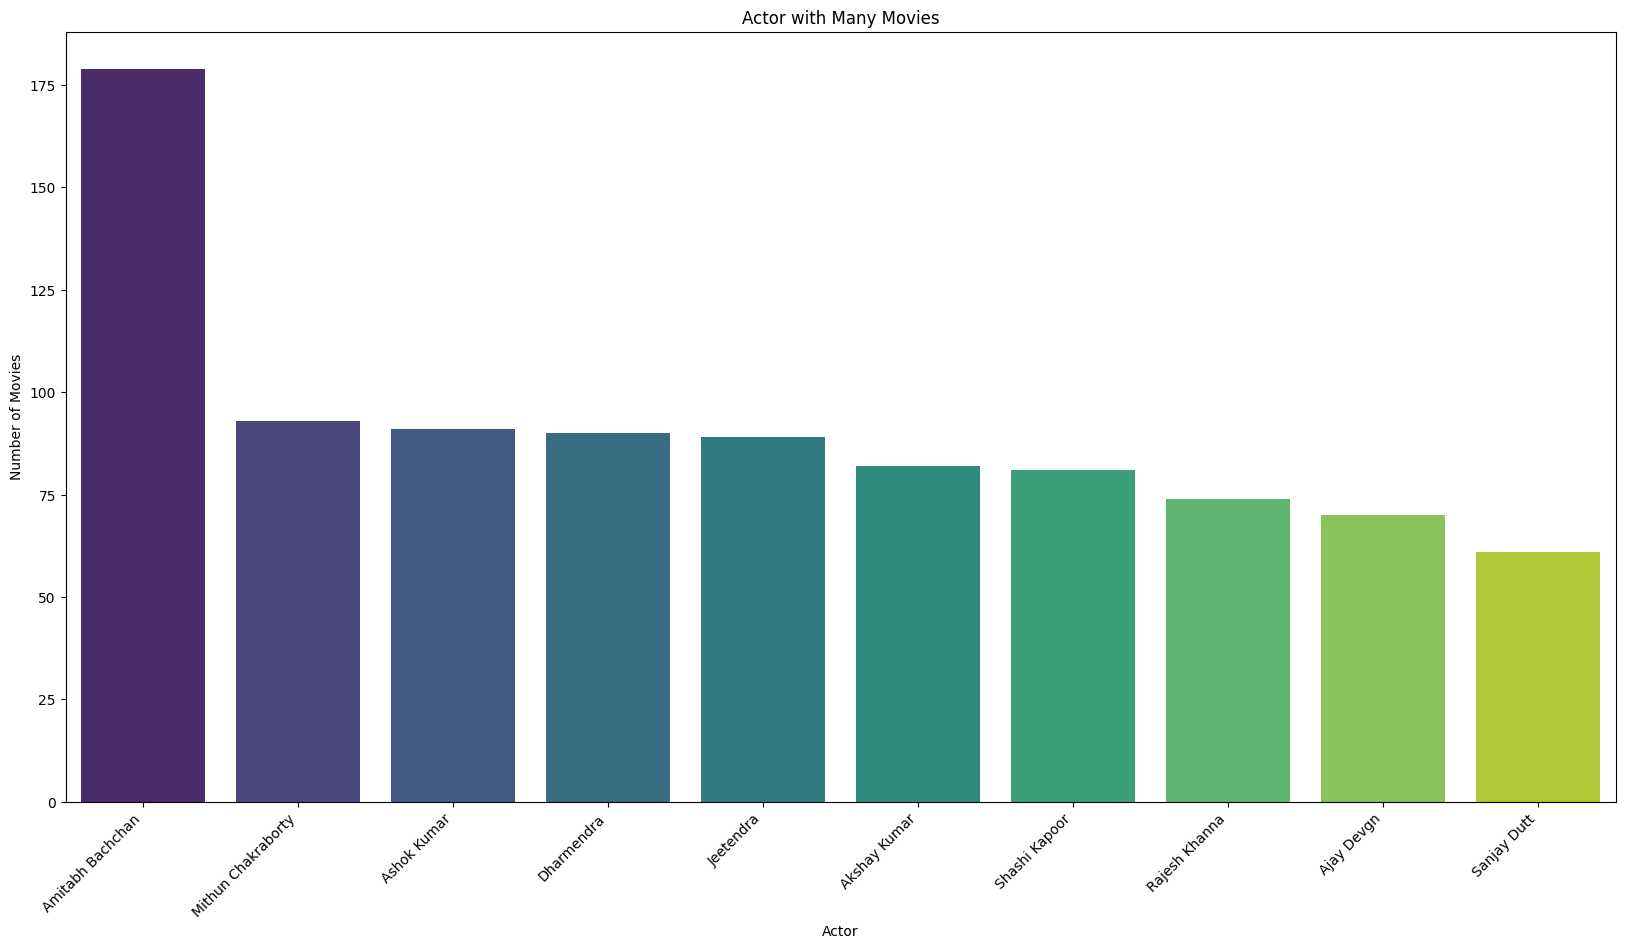

In [ ]:
plt.figure(figsize=(20, 10))

# Assuming 'data' is your DataFrame
top_actors = data['Actor 1'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=top_actors.index, y=top_actors.values, palette="viridis")

plt.title('Actor with Many Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

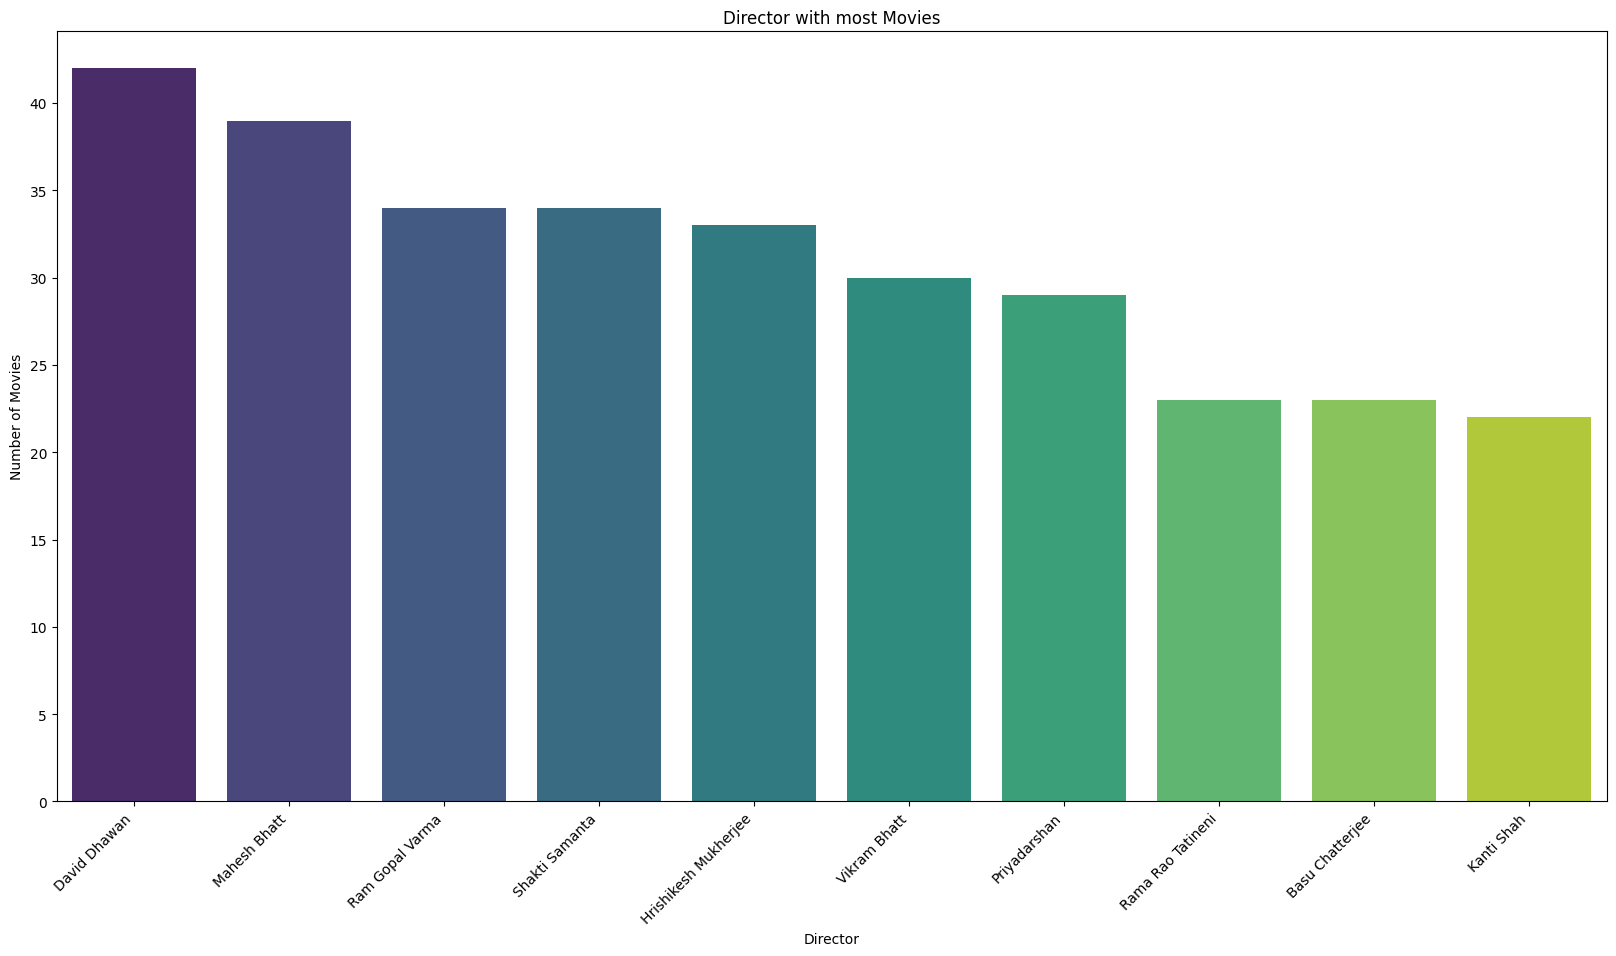

In [ ]:
plt.figure(figsize=(20, 10))

# Assuming 'data' is your DataFrame
top_directors = data['Director'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=top_directors.index, y=top_directors.values, palette="viridis")

plt.title('Director with most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

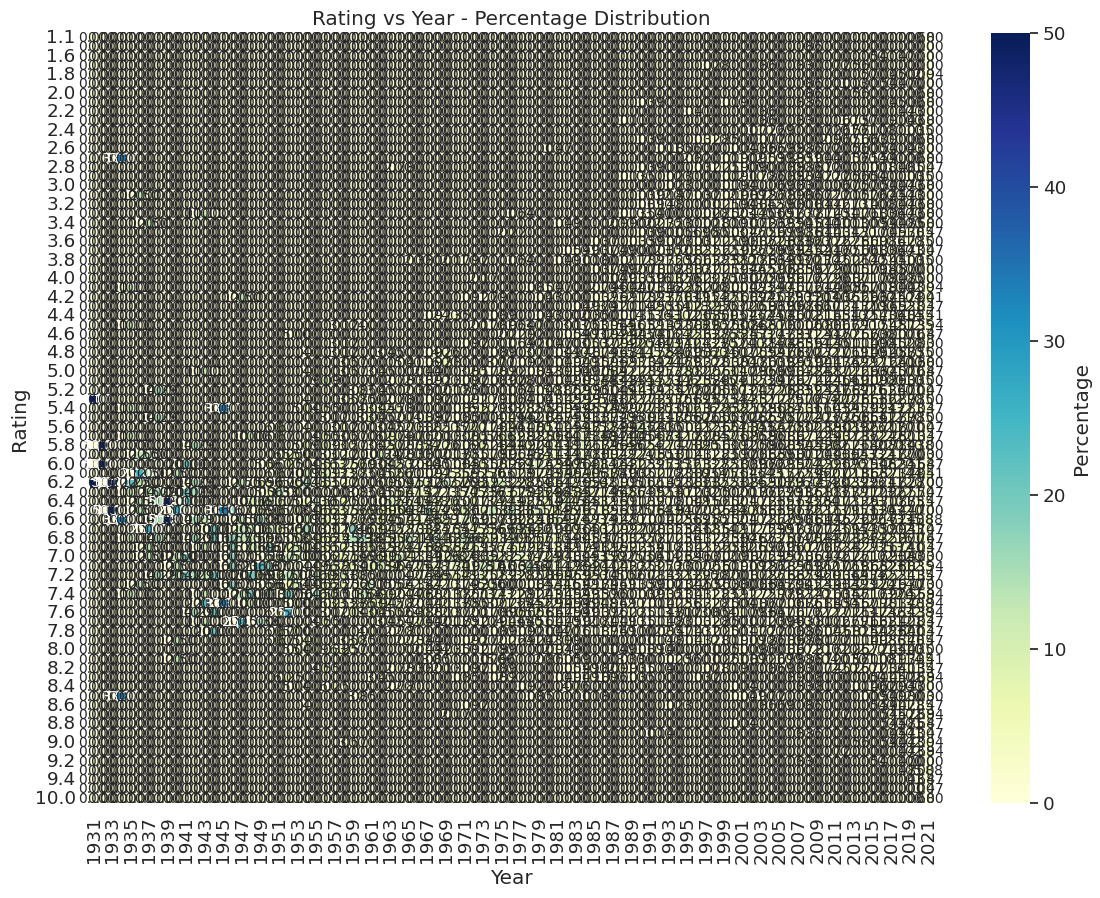

In [ ]:
cross_tab = pd.crosstab(data['Rating'], data['Year'], normalize='columns') * 100

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.2)
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'},
            linewidths=.5, square=True, annot_kws={"size": 10})

plt.title('Rating vs Year - Percentage Distribution')
plt.xlabel('Year')
plt.ylabel('Rating')

plt.show()

<Axes: xlabel='Genre', ylabel='Rating'>

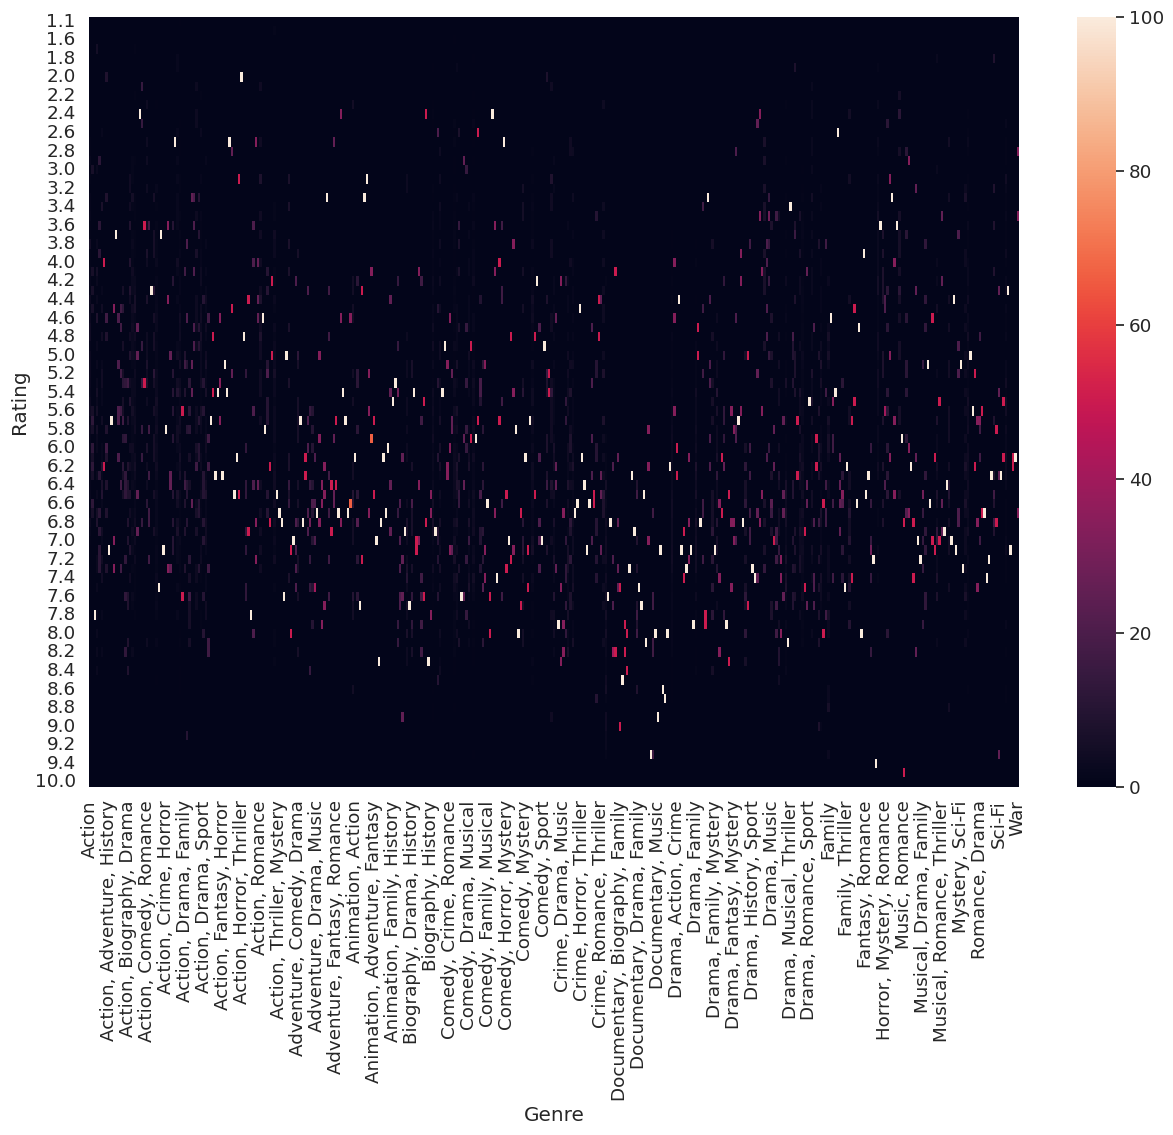

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(data['Rating'], data['Genre'], normalize='columns') * 100)

In [ ]:
genre_counts = data['Genre'].value_counts()
data['Genre_encoded'] = data['Genre'].map(genre_counts)

In [ ]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating

In [ ]:
director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = director_mean_rating
actor_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor_encoded'] = actor_mean_rating

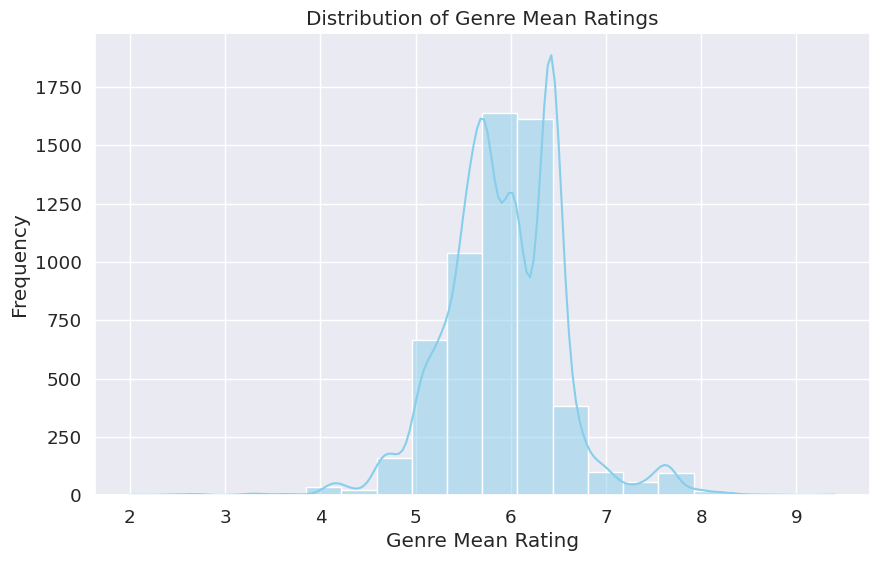

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(data['Genre_mean_rating'], bins=20, kde=True, color='skyblue')

plt.title('Distribution of Genre Mean Ratings')
plt.xlabel('Genre Mean Rating')
plt.ylabel('Frequency')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X = data[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']]
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.6569161033693164


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = data[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']]
y = data['Rating']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('R2 Score: ', r2)

Mean Squared Error:  0.43153876686592635
Mean Absolute Error:  0.4384167378309136
R2 Score:  0.7680543128610445
